# Toronto to Montreal Train Arrival - Exploratory Data Analysis

This notebook analyzes VIA Rail train arrival data specifically for the Toronto to Montreal route.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Toronto to Montreal Data

In [2]:
# Load the Toronto to Montreal route data
df = pd.read_csv('/workspaces/via_rail/via_data_toronto_montreal.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Route: {df['departed'].iloc[0]} → {df['arrived'].iloc[0]}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: 13,677 rows × 14 columns
Route: True → True

First 5 rows:


,train_id,departed,arrived,from,to,instance,stop_id,station,code,estimated,scheduled,eta,diff,diffMin
0,60,True,True,TORONTO,MONTRÉAL,2025-04-01,0,Toronto,TRTO,2025-04-01T10:32:00Z,2025-04-01T10:32:00Z,ARR,goo,0.0
1,60,True,True,TORONTO,MONTRÉAL,2025-04-01,1,Guildwood,GUIL,2025-04-01T10:50:39Z,2025-04-01T10:50:00Z,ARR,goo,0.0
2,60,True,True,TORONTO,MONTRÉAL,2025-04-01,2,Oshawa,OSHA,2025-04-01T11:12:45Z,2025-04-01T11:08:00Z,ARR,goo,4.0
3,60,True,True,TORONTO,MONTRÉAL,2025-04-01,3,Cobourg,CBRG,2025-04-01T11:52:09Z,2025-04-01T11:43:00Z,ARR,med,9.0
4,60,True,True,TORONTO,MONTRÉAL,2025-04-01,4,Belleville,BLVL,2025-04-01T12:27:27Z,2025-04-01T12:18:00Z,ARR,med,9.0


## 3. Dataset Overview

In [3]:
# Display dataset information
print("Dataset Information:")
print("="*60)
df.info()

print("\n" + "="*60)
print("Basic Statistics:")
print(f"Unique Trains: {df['train_id'].nunique()}")
print(f"Unique Stations: {df['station'].nunique()}")
print(f"Date Range: {df['instance'].min()} to {df['instance'].max()}")
print(f"Total Stops Recorded: {len(df):,}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13677 entries, 0 to 13676
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   train_id   13677 non-null  int64  
 1   departed   13677 non-null  bool   
 2   arrived    13677 non-null  bool   
 3   from       13677 non-null  object 
 4   to         13677 non-null  object 
 5   instance   13677 non-null  object 
 6   stop_id    13677 non-null  int64  
 7   station    13677 non-null  object 
 8   code       13677 non-null  object 
 9   estimated  13677 non-null  object 
 10  scheduled  13677 non-null  object 
 11  eta        13677 non-null  object 
 12  diff       13672 non-null  object 
 13  diffMin    13672 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(9)
memory usage: 1.3+ MB

Basic Statistics:
Unique Trains: 6
Unique Stations: 10
Date Range: 2025-04-01 to 2026-01-03
Total Stops Recorded: 13,677


## 4. Train Information

Trains Operating on Toronto → Montreal Route:
train_id
64     2757
68     2483
62     2447
66     2205
60     2131
668    1654
Name: count, dtype: int64


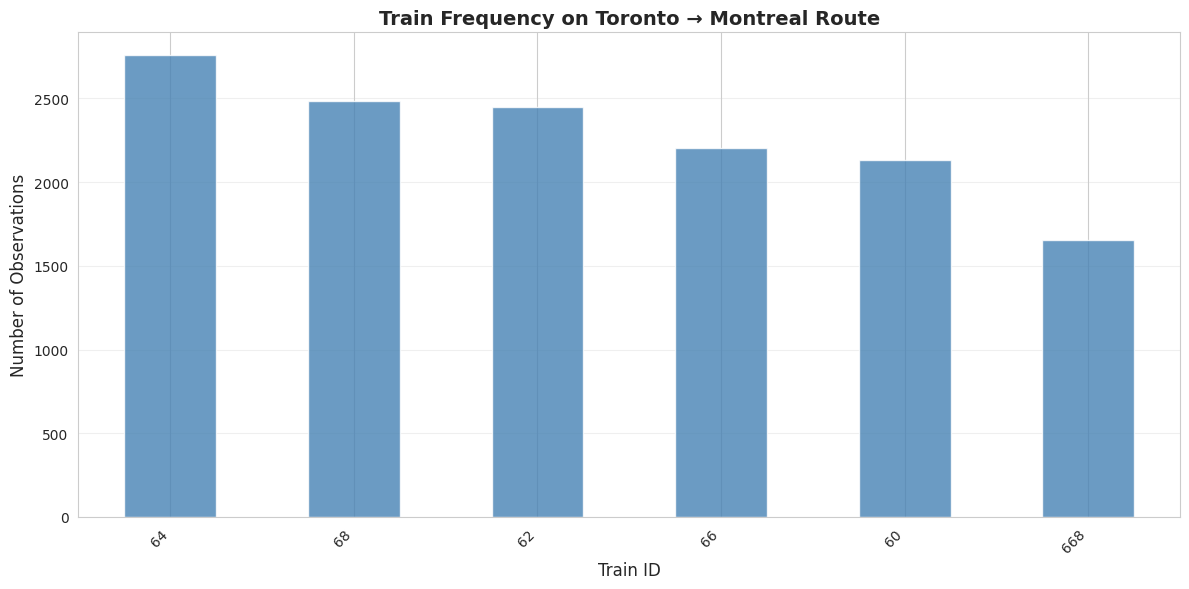

In [4]:
# Analyze trains on this route
print("Trains Operating on Toronto → Montreal Route:")
print("="*60)
train_counts = df['train_id'].value_counts()
print(train_counts)

# Visualize train frequency
plt.figure(figsize=(12, 6))
train_counts.plot(kind='bar', color='steelblue', alpha=0.8)
plt.xlabel('Train ID', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.title('Train Frequency on Toronto → Montreal Route', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Station Analysis

Stations on the Toronto → Montreal Route:
station
Montréal      1576
Dorval        1576
Cornwall      1576
Kingston      1575
Oshawa        1573
Toronto       1568
Belleville    1336
Guildwood     1285
Cobourg       1060
Brockville     552
Name: count, dtype: int64


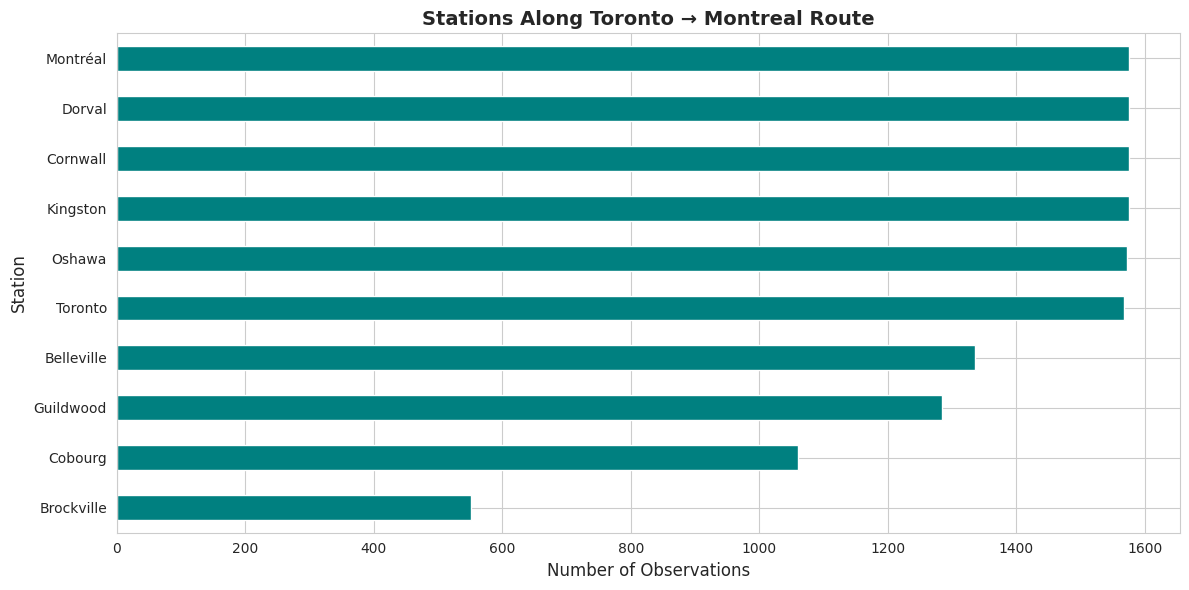


Station Codes:
   station code
Belleville BLVL
Brockville BRKV
   Cobourg CBRG
  Cornwall CWLL
    Dorval DORV
 Guildwood GUIL
  Kingston KGON
  Montréal MTRL
    Oshawa OSHA
   Toronto TRTO


In [5]:
# Analyze stations along the route
print("Stations on the Toronto → Montreal Route:")
print("="*60)
station_counts = df['station'].value_counts()
print(station_counts)

# Visualize stations
plt.figure(figsize=(12, 6))
station_counts.plot(kind='barh', color='teal')
plt.xlabel('Number of Observations', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.title('Stations Along Toronto → Montreal Route', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Station codes
print("\nStation Codes:")
print("="*60)
station_codes = df[['station', 'code']].drop_duplicates().sort_values('station')
print(station_codes.to_string(index=False))

## 6. Delay Analysis

Delay Statistics (diffMin):
count    13672.000000
mean        19.524210
std         29.497905
min        -18.000000
25%          1.000000
50%          9.000000
75%         26.000000
max        346.000000
Name: diffMin, dtype: float64

On-Time Performance:
  On Time (0 min):  2,110 (15.43%)
  Early (<0 min):   755 (5.52%)
  Delayed (>0 min): 10,807 (79.02%)


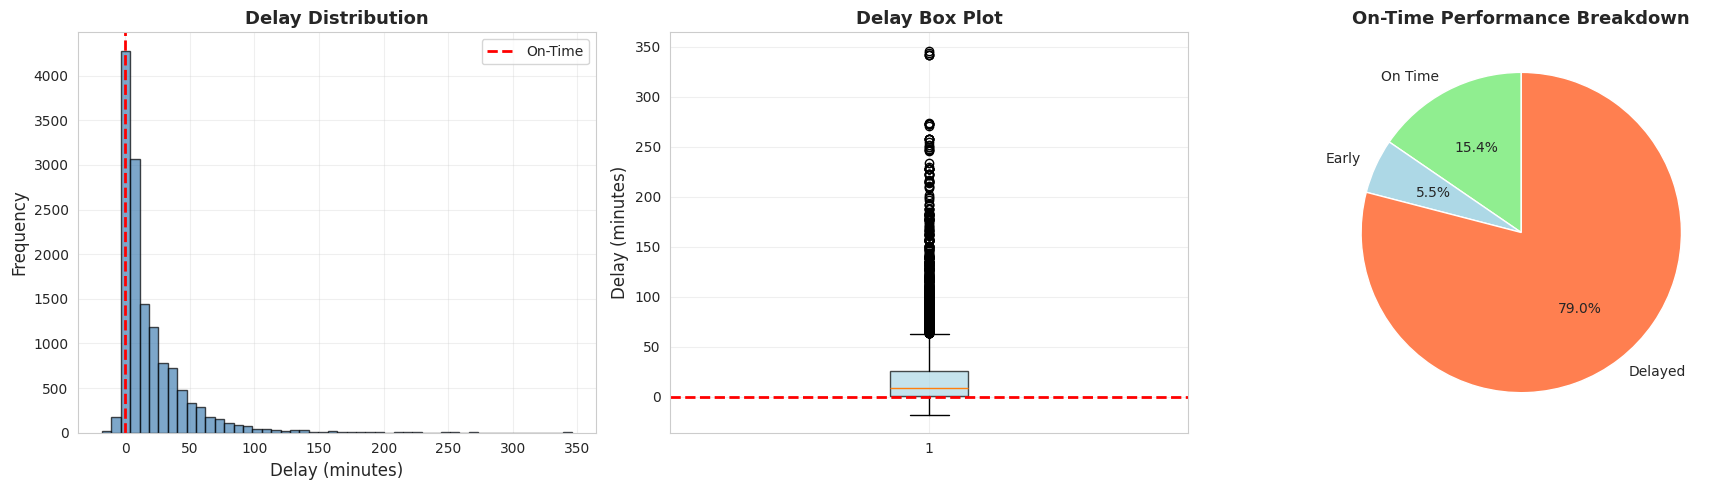

In [6]:
# Comprehensive delay statistics
print("Delay Statistics (diffMin):")
print("="*60)
print(df['diffMin'].describe())

# On-time performance
on_time = (df['diffMin'] == 0).sum()
early = (df['diffMin'] < 0).sum()
delayed = (df['diffMin'] > 0).sum()
total = len(df)

print(f"\nOn-Time Performance:")
print(f"  On Time (0 min):  {on_time:,} ({on_time/total*100:.2f}%)")
print(f"  Early (<0 min):   {early:,} ({early/total*100:.2f}%)")
print(f"  Delayed (>0 min): {delayed:,} ({delayed/total*100:.2f}%)")

# Visualize delay distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['diffMin'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[0].set_xlabel('Delay (minutes)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Delay Distribution', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['diffMin'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[1].set_ylabel('Delay (minutes)', fontsize=12)
axes[1].set_title('Delay Box Plot', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

# Pie chart
delay_categories = ['On Time', 'Early', 'Delayed']
delay_counts = [on_time, early, delayed]
colors = ['lightgreen', 'lightblue', 'coral']
axes[2].pie(delay_counts, labels=delay_categories, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[2].set_title('On-Time Performance Breakdown', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Delays by Station

Delay Statistics by Station:
                 mean  median        std   min    max  count
station                                                     
Montréal    32.983503    24.0  34.660289 -18.0  342.0   1576
Dorval      31.629442    23.0  34.278593 -16.0  342.0   1576
Cornwall    26.293782    17.0  32.606991 -14.0  342.0   1576
Brockville  26.079710    17.0  32.537971  -5.0  273.0    552
Kingston    22.052063    13.0  30.088431  -6.0  344.0   1575
Belleville  16.563623     9.0  26.848090  -2.0  346.0   1336
Oshawa      13.507957     7.0  21.719677  -4.0  252.0   1571
Cobourg     12.908491     6.0  23.621546  -3.0  271.0   1060
Guildwood    7.157566     0.0  18.973011  -3.0  214.0   1282
Toronto      5.311862     0.0  17.220639   0.0  210.0   1568


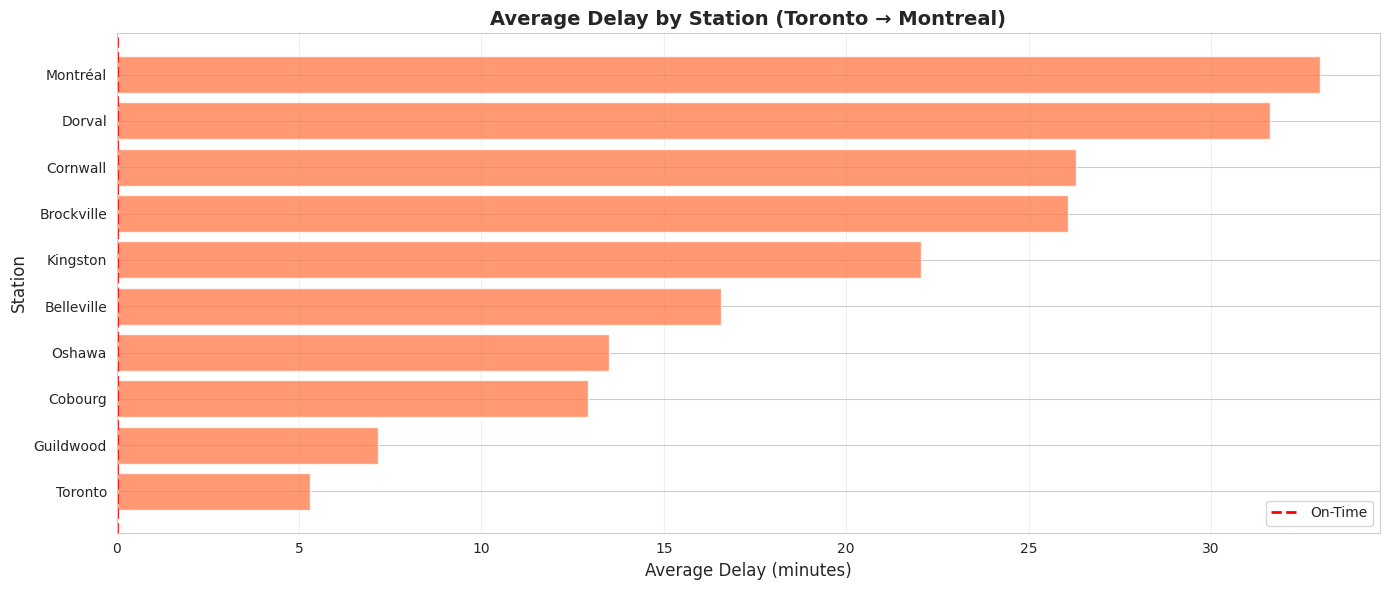

In [7]:
# Analyze delays by station
station_delays = df.groupby('station')['diffMin'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)

print("Delay Statistics by Station:")
print("="*60)
print(station_delays)

# Visualize average delay by station
plt.figure(figsize=(14, 6))
station_avg_delays = station_delays['mean'].sort_values()
plt.barh(range(len(station_avg_delays)), station_avg_delays.values, color='coral', alpha=0.8)
plt.yticks(range(len(station_avg_delays)), station_avg_delays.index)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-Time')
plt.xlabel('Average Delay (minutes)', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.title('Average Delay by Station (Toronto → Montreal)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 8. Delays by Train

Train Performance Comparison:
               mean  median        std   min    max  count
train_id                                                  
668       34.180387    26.0  33.389614  -4.0  258.0   1652
68        26.260677    17.0  31.161554  -9.0  274.0   2482
66        19.742404    11.0  28.883313  -4.0  346.0   2205
64        15.493653     5.0  31.319119 -18.0  250.0   2757
62        13.571954     4.0  24.038218 -11.0  258.0   2446
60        12.133803     4.5  21.405596 -14.0  228.0   2130


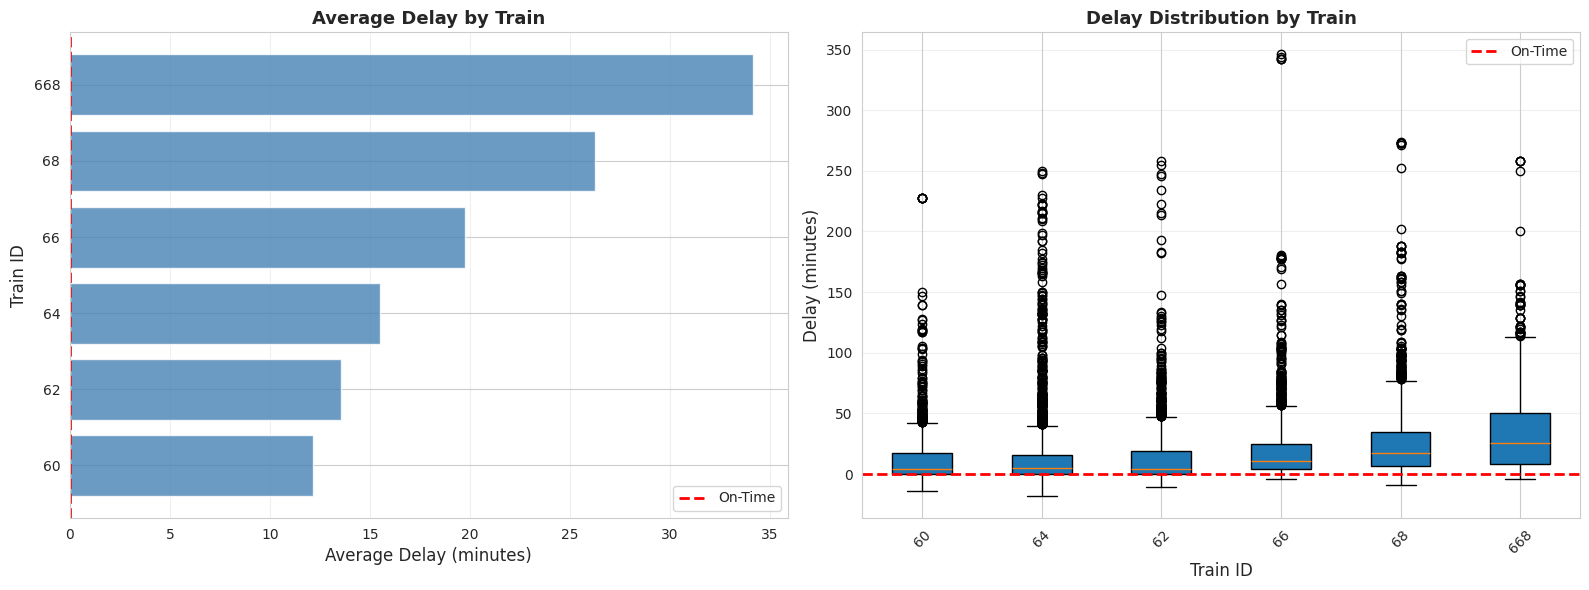

In [8]:
# Analyze performance by train
train_performance = df.groupby('train_id')['diffMin'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)

print("Train Performance Comparison:")
print("="*60)
print(train_performance)

# Visualize train performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average delay by train
train_avg = train_performance['mean'].sort_values()
axes[0].barh(range(len(train_avg)), train_avg.values, color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(train_avg)))
axes[0].set_yticklabels(train_avg.index)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[0].set_xlabel('Average Delay (minutes)', fontsize=12)
axes[0].set_ylabel('Train ID', fontsize=12)
axes[0].set_title('Average Delay by Train', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='x')

# Box plot comparison
train_ids = df['train_id'].unique()
train_data = [df[df['train_id'] == tid]['diffMin'].dropna() for tid in train_ids]
axes[1].boxplot(train_data, labels=train_ids, patch_artist=True)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='On-Time')
axes[1].set_xlabel('Train ID', fontsize=12)
axes[1].set_ylabel('Delay (minutes)', fontsize=12)
axes[1].set_title('Delay Distribution by Train', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Temporal Analysis

Daily Statistics:
         date  mean_delay  median_delay  count
0  2025-04-01    9.288462           8.0     52
1  2025-04-02   11.000000           7.5     52
2  2025-04-03   16.769231          14.0     52
3  2025-04-04    8.000000           6.0     52
4  2025-04-05   14.355556           9.0     45
5  2025-04-06   21.976744          20.0     43
6  2025-04-07   11.576923           9.0     52
7  2025-04-08   11.115385          10.0     52
8  2025-04-09   37.788462          37.5     52
9  2025-04-10   17.615385          11.0     52


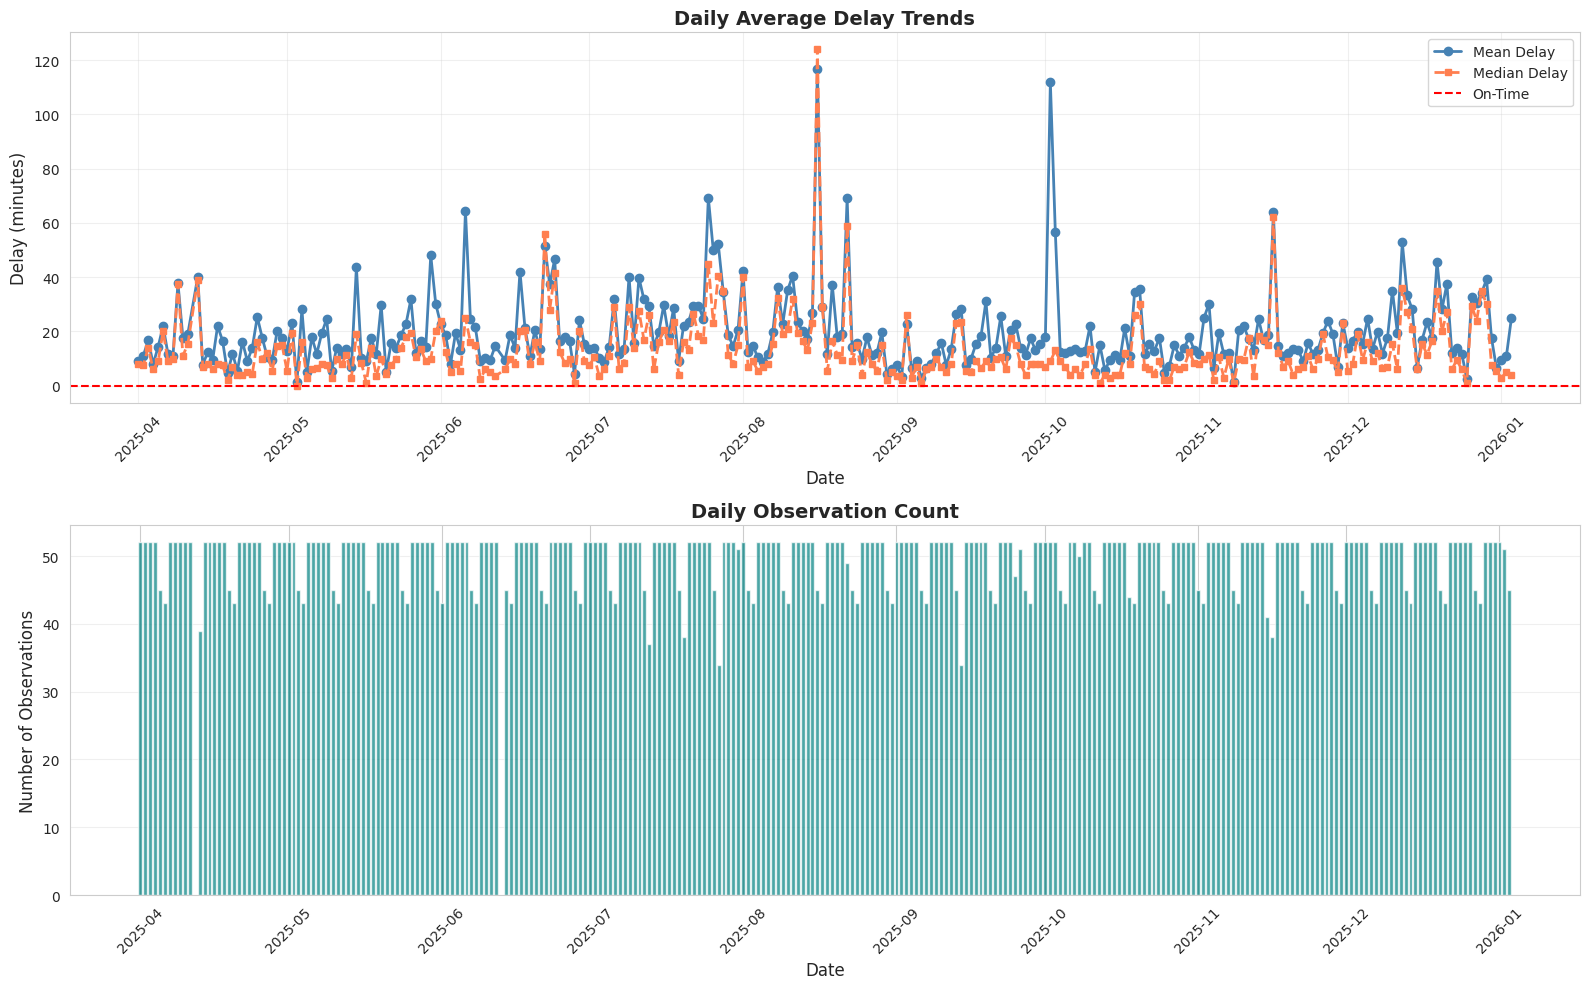

In [9]:
# Convert instance to datetime
df['date'] = pd.to_datetime(df['instance'])
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Daily delay trends
daily_delays = df.groupby(df['date'].dt.date).agg({
    'diffMin': ['mean', 'median', 'count']
}).reset_index()
daily_delays.columns = ['date', 'mean_delay', 'median_delay', 'count']

print("Daily Statistics:")
print("="*60)
print(daily_delays.head(10))

# Visualize temporal trends
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Average delay over time
axes[0].plot(daily_delays['date'], daily_delays['mean_delay'], marker='o', linestyle='-', 
             color='steelblue', linewidth=2, markersize=6, label='Mean Delay')
axes[0].plot(daily_delays['date'], daily_delays['median_delay'], marker='s', linestyle='--', 
             color='coral', linewidth=2, markersize=5, label='Median Delay')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='On-Time')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Delay (minutes)', fontsize=12)
axes[0].set_title('Daily Average Delay Trends', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Number of observations over time
axes[1].bar(daily_delays['date'], daily_delays['count'], color='teal', alpha=0.7)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of Observations', fontsize=12)
axes[1].set_title('Daily Observation Count', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Stop Sequence Analysis

Delay Accumulation by Stop Sequence:
   stop_id       mean  median  count
0        0   5.413333     0.0   1575
1        1   8.996186     2.0   1573
2        2  14.539683     7.0   1575
3        3  18.866032     9.0   1575
4        4  21.703751    11.0   1573
5        5  24.622378    14.0   1573
6        6  26.944515    18.0   1568
7        7  29.077269    21.0   1333
8        8  29.596774    21.5   1054
9        9  24.062271     8.0    273


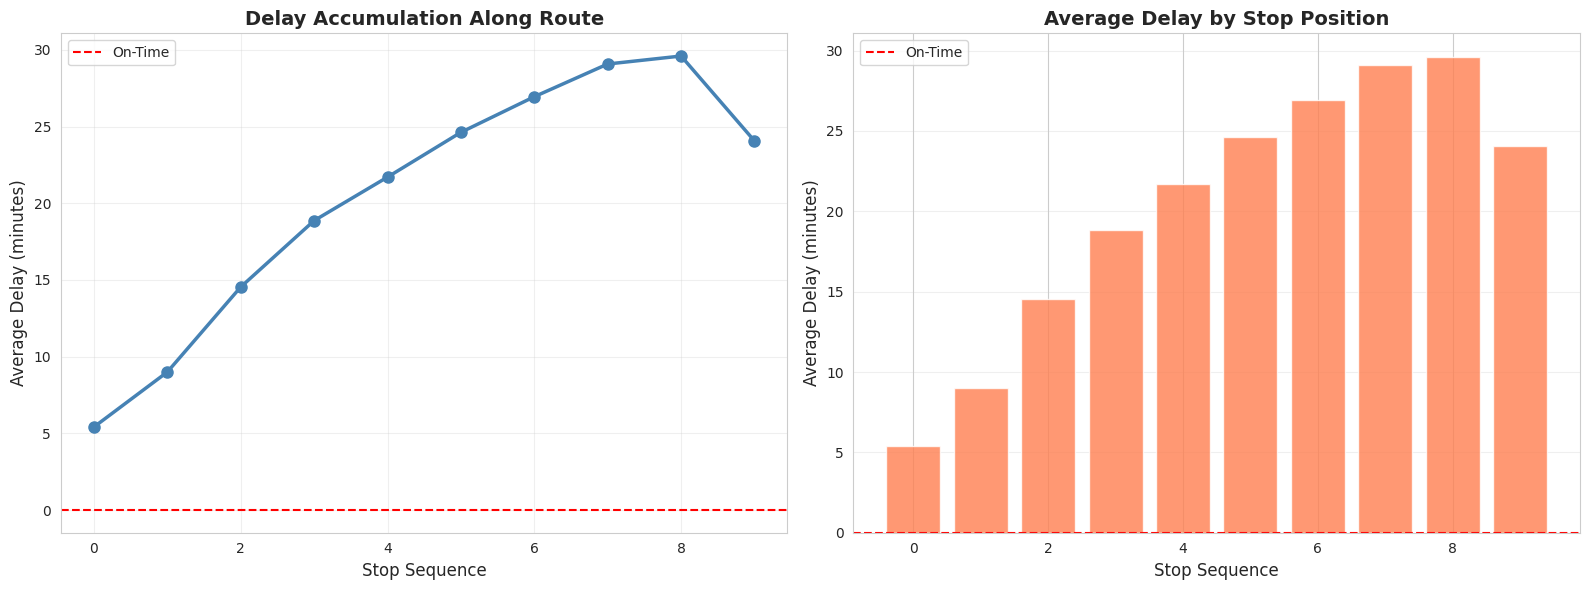


Stop Sequence to Station Mapping:
Stop 0: Toronto              (Avg Delay: +5.41 min)
Stop 1: Guildwood            (Avg Delay: +9.00 min)
Stop 2: Oshawa               (Avg Delay: +14.54 min)
Stop 3: Cobourg              (Avg Delay: +18.87 min)
Stop 4: Belleville           (Avg Delay: +21.70 min)
Stop 5: Kingston             (Avg Delay: +24.62 min)
Stop 6: Cornwall             (Avg Delay: +26.94 min)
Stop 7: Dorval               (Avg Delay: +29.08 min)
Stop 8: Montréal             (Avg Delay: +29.60 min)
Stop 9: Montréal             (Avg Delay: +24.06 min)


In [10]:
# Analyze delays by stop sequence
stop_delays = df.groupby('stop_id')['diffMin'].agg(['mean', 'median', 'count']).reset_index()

print("Delay Accumulation by Stop Sequence:")
print("="*60)
print(stop_delays)

# Visualize delay progression
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line plot of delay progression
axes[0].plot(stop_delays['stop_id'], stop_delays['mean'], marker='o', 
             color='steelblue', linewidth=2.5, markersize=8)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='On-Time')
axes[0].set_xlabel('Stop Sequence', fontsize=12)
axes[0].set_ylabel('Average Delay (minutes)', fontsize=12)
axes[0].set_title('Delay Accumulation Along Route', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].legend()

# Bar plot
axes[1].bar(stop_delays['stop_id'], stop_delays['mean'], color='coral', alpha=0.8)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='On-Time')
axes[1].set_xlabel('Stop Sequence', fontsize=12)
axes[1].set_ylabel('Average Delay (minutes)', fontsize=12)
axes[1].set_title('Average Delay by Stop Position', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
axes[1].legend()

plt.tight_layout()
plt.show()

# Show which station corresponds to each stop
print("\nStop Sequence to Station Mapping:")
print("="*60)
stop_station_map = df.groupby('stop_id')['station'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
for stop_id, station in stop_station_map.items():
    avg_delay = stop_delays[stop_delays['stop_id'] == stop_id]['mean'].values[0]
    print(f"Stop {stop_id}: {station:20s} (Avg Delay: {avg_delay:+.2f} min)")

## 11. Summary Statistics

In [11]:
print("="*60)
print("TORONTO → MONTREAL ROUTE SUMMARY")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"  • Total Observations: {len(df):,}")
print(f"  • Unique Trains: {df['train_id'].nunique()}")
print(f"  • Stations on Route: {df['station'].nunique()}")
print(f"  • Date Range: {df['instance'].min()} to {df['instance'].max()}")

print(f"\n⏰ Overall Performance:")
on_time_pct = (df['diffMin'] == 0).sum() / len(df) * 100
early_pct = (df['diffMin'] < 0).sum() / len(df) * 100
delayed_pct = (df['diffMin'] > 0).sum() / len(df) * 100
print(f"  • On-Time Rate: {on_time_pct:.2f}%")
print(f"  • Early Rate: {early_pct:.2f}%")
print(f"  • Delayed Rate: {delayed_pct:.2f}%")
print(f"  • Average Delay: {df['diffMin'].mean():.2f} minutes")
print(f"  • Median Delay: {df['diffMin'].median():.2f} minutes")
print(f"  • Max Delay: {df['diffMin'].max():.2f} minutes")
print(f"  • Max Early: {df['diffMin'].min():.2f} minutes")

print(f"\n🚂 Best Performing Train:")
best_train = train_performance['mean'].idxmin()
best_avg = train_performance['mean'].min()
print(f"  • Train: {best_train}")
print(f"  • Average Delay: {best_avg:.2f} minutes")

print(f"\n🚂 Worst Performing Train:")
worst_train = train_performance['mean'].idxmax()
worst_avg = train_performance['mean'].max()
print(f"  • Train: {worst_train}")
print(f"  • Average Delay: {worst_avg:.2f} minutes")

print(f"\n🏢 Station with Most Delays:")
worst_station = station_delays['mean'].idxmax()
worst_station_delay = station_delays['mean'].max()
print(f"  • Station: {worst_station}")
print(f"  • Average Delay: {worst_station_delay:.2f} minutes")

print(f"\n🏢 Most Punctual Station:")
best_station = station_delays['mean'].idxmin()
best_station_delay = station_delays['mean'].min()
print(f"  • Station: {best_station}")
print(f"  • Average Delay: {best_station_delay:.2f} minutes")

print("\n" + "="*60)

TORONTO → MONTREAL ROUTE SUMMARY

📊 Dataset Overview:
  • Total Observations: 13,677
  • Unique Trains: 6
  • Stations on Route: 10
  • Date Range: 2025-04-01 to 2026-01-03

⏰ Overall Performance:
  • On-Time Rate: 15.43%
  • Early Rate: 5.52%
  • Delayed Rate: 79.02%
  • Average Delay: 19.52 minutes
  • Median Delay: 9.00 minutes
  • Max Delay: 346.00 minutes
  • Max Early: -18.00 minutes

🚂 Best Performing Train:
  • Train: 60
  • Average Delay: 12.13 minutes

🚂 Worst Performing Train:
  • Train: 668
  • Average Delay: 34.18 minutes

🏢 Station with Most Delays:
  • Station: Montréal
  • Average Delay: 32.98 minutes

🏢 Most Punctual Station:
  • Station: Toronto
  • Average Delay: 5.31 minutes

